<a href="https://colab.research.google.com/github/GarimaMahendru/MyRepository/blob/main/Decision_tree_project_for_employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [ ]:
from google.colab import files
uploaded = files.upload()             # To upload train data

Saving train.csv to train.csv


In [ ]:
train_data=pd.read_csv("train.csv")     # Reading train data using pd.read

In [ ]:
from google.colab import files
uploaded = files.upload()             # To upload test data

Saving test.csv to test.csv


In [ ]:
test_data=pd.read_csv("test.csv")        # Reading test data using pd.read

In [ ]:
train_data.head()   # To view top 5 rows of the data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
test_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [ ]:
train_data.dtypes[train_data.dtypes=='object'].index      # To extract the names of columns with object datatype

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
test_data.dtypes[test_data.dtypes=='object'].index    # Performing same operations on both train and test data

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
train_data_cat=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition']             # Making a list of columns with object datatypes in order to make it
                                                                                  # convenient for univariate and bivariate analysis

In [ ]:
test_data_cat=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition']

In [ ]:
# Relationship between target variable(Attrition) and variables with object data type

In [ ]:
from scipy import stats
dg=[]
for i in train_data_cat: # This loop will extract one variable at a time from the list we made above
  ct=pd.crosstab(train_data[i], train_data["Attrition"])  # The cross tab is essential for this test as it provides the observed frequencies required to calculate the Chi-square statistic.
  p=stats.chi2_contingency(ct)[1]
  if p<0.05:
    print(f"There is Relationship between {i} and attrition ")
    dg.append((i,train_data["Attrition"]))
  else:
    print(f"There is no Relationship between {i} and attrition ")
 # Since our target variable is in object datatype we need to perform Chi Square test to
 #check if there is any relationship between a variable of object datatype and the target variable

There is Relationship between Gender and attrition 
There is Relationship between Job Role and attrition 
There is Relationship between Work-Life Balance and attrition 
There is Relationship between Job Satisfaction and attrition 
There is Relationship between Performance Rating and attrition 
There is Relationship between Overtime and attrition 
There is Relationship between Education Level and attrition 
There is Relationship between Marital Status and attrition 
There is Relationship between Job Level and attrition 
There is Relationship between Company Size and attrition 
There is Relationship between Remote Work and attrition 
There is Relationship between Leadership Opportunities and attrition 
There is Relationship between Innovation Opportunities and attrition 
There is Relationship between Company Reputation and attrition 
There is no Relationship between Employee Recognition and attrition 
There is Relationship between Attrition and attrition 


In [ ]:
from scipy import stats
dg=[]
for i in test_data_cat:
  ct=pd.crosstab(test_data[i], test_data["Attrition"])
  p=stats.chi2_contingency(ct)[1]
  if p<0.05:
    print(f"There is Relationship between {i} and attrition ")
    dg.append((i,test_data["Attrition"]))
  else:
    print(f"There is no Relationship between {i} and attrition ")

There is Relationship between Gender and attrition 
There is Relationship between Job Role and attrition 
There is Relationship between Work-Life Balance and attrition 
There is Relationship between Job Satisfaction and attrition 
There is Relationship between Performance Rating and attrition 
There is Relationship between Overtime and attrition 
There is Relationship between Education Level and attrition 
There is Relationship between Marital Status and attrition 
There is Relationship between Job Level and attrition 
There is Relationship between Company Size and attrition 
There is Relationship between Remote Work and attrition 
There is Relationship between Leadership Opportunities and attrition 
There is Relationship between Innovation Opportunities and attrition 
There is Relationship between Company Reputation and attrition 
There is no Relationship between Employee Recognition and attrition 
There is Relationship between Attrition and attrition 


In [ ]:
# Since there is no relation between employee recognition and attrition, we can drop this column

In [ ]:
train_data.drop('Employee Recognition',axis=1,inplace=True)

In [ ]:
test_data.drop('Employee Recognition',axis=1,inplace=True)

In [ ]:
# Univariate Analysis

In [ ]:
for i in train_data_cat: # This loop will extract one categorical variable at a time and print its value count and well as number of unique values
  print(f"Results for {i}------------------\n")
  print(train_data[i].value_counts(dropna=False))
  print(f"Total Unique Category : : {train_data[i].nunique()}")


Results for Gender------------------

Gender
Male      32739
Female    26859
Name: count, dtype: int64
Total Unique Category : : 2
Results for Job Role------------------

Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64
Total Unique Category : : 5
Results for Work-Life Balance------------------

Work-Life Balance
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: count, dtype: int64
Total Unique Category : : 4
Results for Job Satisfaction------------------

Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64
Total Unique Category : : 4
Results for Performance Rating------------------

Performance Rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64
Total Unique Category : : 4
Results for Overtime------------------

Overtime
No     401

In [ ]:
for i in test_data_cat:
  print(f"Results for {i}------------------\n")
  print(test_data[i].value_counts(dropna=False))
  print(f"Total Unique Category : : {test_data[i].nunique()}")

Results for Gender------------------

Gender
Male      8087
Female    6813
Name: count, dtype: int64
Total Unique Category : : 2
Results for Job Role------------------

Job Role
Technology    3815
Healthcare    3432
Education     3168
Media         2422
Finance       2063
Name: count, dtype: int64
Total Unique Category : : 5
Results for Work-Life Balance------------------

Work-Life Balance
Good         5630
Fair         4483
Excellent    2713
Poor         2074
Name: count, dtype: int64
Total Unique Category : : 4
Results for Job Satisfaction------------------

Job Satisfaction
High         7466
Very High    2968
Medium       2900
Low          1566
Name: count, dtype: int64
Total Unique Category : : 4
Results for Performance Rating------------------

Performance Rating
Average          8909
High             3022
Below Average    2189
Low               780
Name: count, dtype: int64
Total Unique Category : : 4
Results for Overtime------------------

Overtime
No     10009
Yes     4891
Nam

In [ ]:
train_data.dtypes

Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Attrition                   object
dtype: object

In [ ]:
train_data.dtypes[train_data.dtypes!='object'].index   # To extract the names of non-object or numeric variables/columns

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

In [ ]:
test_data.dtypes[train_data.dtypes!='object'].index

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

In [ ]:
train_data_num=['Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'] # Making a list of these numeric column names in order to perform univariate and bivariate analysis

In [ ]:
test_data_num=[ 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure']

In [ ]:
train_data.isnull().sum()  # To check if there are any null values in the data

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Attrition                   0
dtype: int64

In [ ]:
test_data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Attrition                   0
dtype: int64

In [ ]:
train_data.drop('Employee ID',axis=1,inplace=True) # Dropping employee id as it is not needed for the analysis

In [ ]:
test_data.drop('Employee ID',axis=1,inplace=True)

In [ ]:
train_data.shape

(59598, 22)

In [ ]:
test_data.shape

(14900, 22)

In [ ]:
# Bivariate analysis for numeric variables

In [ ]:

for i in train_data_num: # This loop will extract one numeric variable at a time and print its summary statistics
  print(f"Results for {i}------------------\n")
  a=stats.f_oneway(train_data[i][train_data['Attrition']=='Stayed'],train_data[i][train_data['Attrition']=='Left'])
  print(a)
  if a[1]<0.05:
    print(f"There is Relationship between {i} and attrition ")
  else:
    print(f"There is no Relationship between {i} and attrition ")
# Using one way anova to check relationship between numeric columns and categirical target variable(Attrition)

Results for Age------------------

F_onewayResult(statistic=142.84687387450097, pvalue=6.923807305698102e-33)
There is Relationship between Age and attrition 
Results for Years at Company------------------

F_onewayResult(statistic=252.15450595241234, pvalue=1.1512521082296197e-56)
There is Relationship between Years at Company and attrition 
Results for Monthly Income------------------

F_onewayResult(statistic=7.715198487670606, pvalue=0.005477495138819218)
There is Relationship between Monthly Income and attrition 
Results for Number of Promotions------------------

F_onewayResult(statistic=389.5992669458673, pvalue=1.913648082138159e-86)
There is Relationship between Number of Promotions and attrition 
Results for Distance from Home------------------

F_onewayResult(statistic=549.3449836660271, pvalue=6.178870492688645e-121)
There is Relationship between Distance from Home and attrition 
Results for Number of Dependents------------------

F_onewayResult(statistic=367.9831946150773,

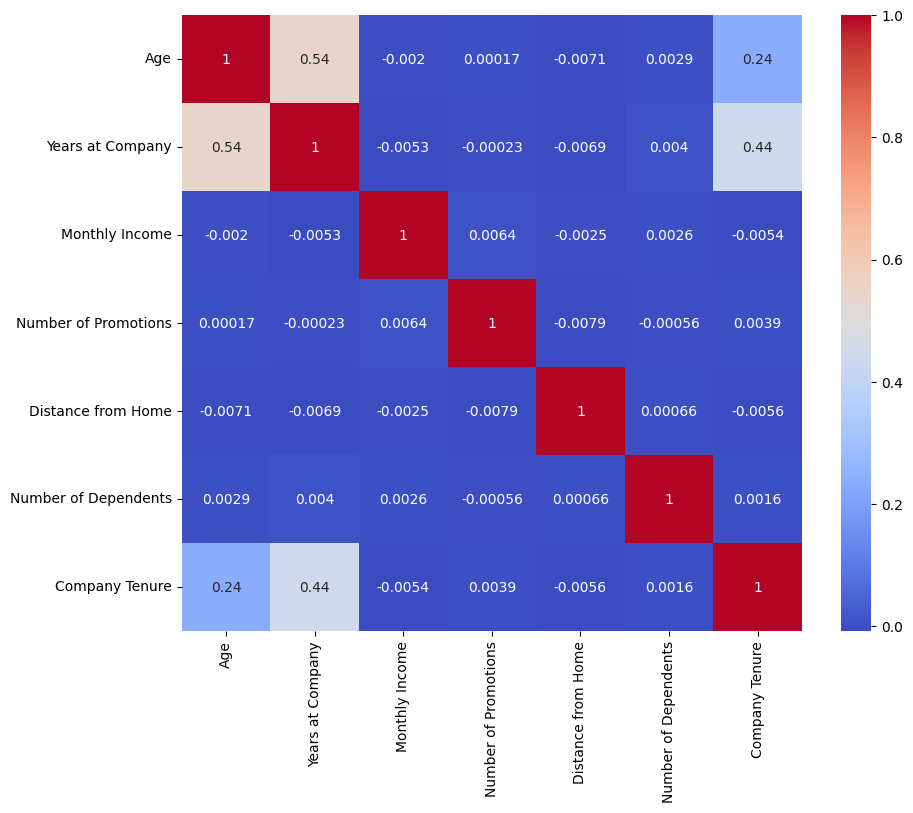

In [ ]:
plt.figure(figsize=(10,8))
s=train_data[train_data_num].corr()
sns.heatmap(s,cmap="coolwarm", annot=True)
plt.show()
                                              # Plotting heatmap to have a visual representation of the correlation between numeric to numeric columns
                                              # There is no strong correlation between these variables

In [ ]:
from scipy import stats
dg=[]                            #Using Chi square to check relationship between two categorical variables
for i in test_data_cat:
  for j in test_data_cat:
    ct=pd.crosstab(test_data[i], test_data[j])
    p=stats.chi2_contingency(ct)[1]
    if p<0.05:
      print(f"There is Relationship between {i} and {j} ")
      dg.append((i,j))
    else:
      print(f"There is no Relationship between {i} and {j} ")

There is Relationship between Gender and Gender 
There is no Relationship between Gender and Job Role 
There is no Relationship between Gender and Work-Life Balance 
There is no Relationship between Gender and Job Satisfaction 
There is no Relationship between Gender and Performance Rating 
There is no Relationship between Gender and Overtime 
There is no Relationship between Gender and Education Level 
There is Relationship between Gender and Marital Status 
There is no Relationship between Gender and Job Level 
There is no Relationship between Gender and Company Size 
There is no Relationship between Gender and Remote Work 
There is no Relationship between Gender and Leadership Opportunities 
There is no Relationship between Gender and Innovation Opportunities 
There is no Relationship between Gender and Company Reputation 
There is Relationship between Gender and Attrition 
There is no Relationship between Job Role and Gender 
There is Relationship between Job Role and Job Role 
The

In [ ]:
# Job satisfaction and overtime
# gender and marital status
# These are the variables that have relationship
# We can drop them or keep them and drop afterwards


[('Gender', 'Gender'),
 ('Gender', 'Marital Status'),
 ('Gender', 'Attrition'),
 ('Job Role', 'Job Role'),
 ('Job Role', 'Attrition'),
 ('Work-Life Balance', 'Work-Life Balance'),
 ('Work-Life Balance', 'Attrition'),
 ('Job Satisfaction', 'Job Satisfaction'),
 ('Job Satisfaction', 'Overtime'),
 ('Job Satisfaction', 'Attrition'),
 ('Performance Rating', 'Performance Rating'),
 ('Performance Rating', 'Attrition'),
 ('Overtime', 'Job Satisfaction'),
 ('Overtime', 'Overtime'),
 ('Overtime', 'Education Level'),
 ('Overtime', 'Attrition'),
 ('Education Level', 'Overtime'),
 ('Education Level', 'Education Level'),
 ('Education Level', 'Attrition'),
 ('Marital Status', 'Gender'),
 ('Marital Status', 'Marital Status'),
 ('Marital Status', 'Attrition'),
 ('Job Level', 'Job Level'),
 ('Job Level', 'Attrition'),
 ('Company Size', 'Company Size'),
 ('Company Size', 'Attrition'),
 ('Remote Work', 'Remote Work'),
 ('Remote Work', 'Attrition'),
 ('Leadership Opportunities', 'Leadership Opportunities')

In [ ]:
from scipy import stats
dg=[]
for i in train_data_cat:
  for j in train_data_cat:
    ct=pd.crosstab(train_data[i], train_data[j])
    p=stats.chi2_contingency(ct)[1]
    if p<0.05:
      print(f"There is Relationship between {i} and {j} ")
      dg.append((i,j))
    else:
      print(f"There is no Relationship between {i} and {j} ")

There is Relationship between Gender and Gender 
There is no Relationship between Gender and Job Role 
There is no Relationship between Gender and Work-Life Balance 
There is no Relationship between Gender and Job Satisfaction 
There is no Relationship between Gender and Performance Rating 
There is no Relationship between Gender and Overtime 
There is no Relationship between Gender and Education Level 
There is no Relationship between Gender and Marital Status 
There is no Relationship between Gender and Job Level 
There is no Relationship between Gender and Company Size 
There is no Relationship between Gender and Remote Work 
There is no Relationship between Gender and Leadership Opportunities 
There is no Relationship between Gender and Innovation Opportunities 
There is no Relationship between Gender and Company Reputation 
There is Relationship between Gender and Attrition 
There is no Relationship between Job Role and Gender 
There is Relationship between Job Role and Job Role 


In [ ]:
train_data.dtypes[train_data.dtypes!='object'].index

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')

In [ ]:
test_data.dtypes[test_data.dtypes!='object'].index

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')

In [ ]:
train_data.dtypes[train_data.dtypes=='object'].index

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition'],
      dtype='object')

In [ ]:
test_data.dtypes[test_data.dtypes=='object'].index

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition'],
      dtype='object')

In [ ]:
train_data.shape

(59598, 22)

In [ ]:
test_data.shape

(14900, 22)

In [ ]:
train_data[['Company Tenure','Years at Company']] # Checking if both company tenure and years at company are same

,Company Tenure,Years at Company
0,89,19
1,21,4
2,74,10
3,50,7
4,68,41
...,...,...
59593,35,12
59594,73,4
59595,29,14
59596,9,8


In [ ]:
# Outlier Treatment

In [ ]:
train_data_num=['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure']

In [ ]:
test_data_num=['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure']

In [ ]:
train_data[train_data_num].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T # Checking the mean, std, min, max and quantiles of train data using describe function

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Age,59598.0,38.565875,12.079673,18.0,20.0,28.0,39.0,49.0,55.0,57.0,59.00,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,2.0,7.0,13.0,23.0,33.0,38.0,46.00,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,3900.0,5658.0,7354.0,8880.0,10107.0,10806.0,12139.09,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.0,0.0,1.0,2.0,2.0,3.0,4.00,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,6.0,25.0,50.0,75.0,90.0,94.0,98.00,99.0
Number of Dependents,59598.0,1.648075,1.555689,0.0,0.0,0.0,1.0,3.0,4.0,5.0,6.00,6.0
Company Tenure,59598.0,55.758415,25.411090,2.0,15.0,36.0,56.0,76.0,89.0,97.0,110.00,128.0


In [ ]:
test_data[test_data_num].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Age,14900.0,38.385235,12.097904,18.0,20.00,28.00,38.0,49.0,55.0,57.0,59.00,59.0
Years at Company,14900.0,15.592416,11.133792,1.0,2.00,7.00,13.0,23.0,32.0,38.0,45.00,51.0
Monthly Income,14900.0,7287.306040,2156.737934,1226.0,3878.95,5633.75,7332.0,8852.0,10094.0,10848.0,12171.05,15063.0
Number of Promotions,14900.0,0.834362,0.996511,0.0,0.00,0.00,1.0,2.0,2.0,3.0,4.00,4.0
Distance from Home,14900.0,49.927315,28.702307,1.0,5.00,25.00,50.0,75.0,90.0,95.0,99.00,99.0
Number of Dependents,14900.0,1.659329,1.545401,0.0,0.00,0.00,1.0,3.0,4.0,4.0,5.00,6.0
Company Tenure,14900.0,55.603624,25.352807,2.0,15.00,36.00,56.0,75.0,89.0,97.0,111.00,127.0


Results for Age------------------



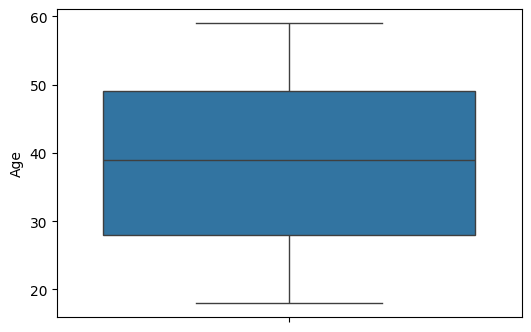

Results for Years at Company------------------



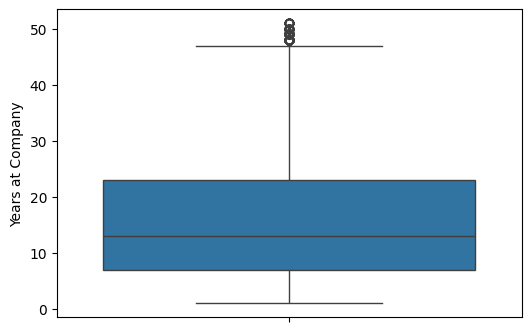

Results for Monthly Income------------------



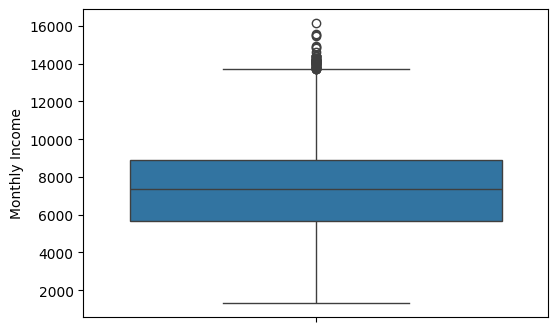

Results for Number of Promotions------------------



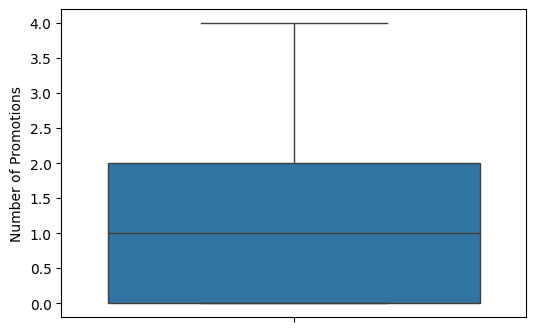

Results for Distance from Home------------------



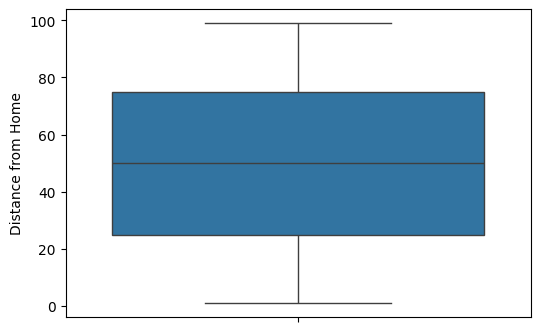

Results for Number of Dependents------------------



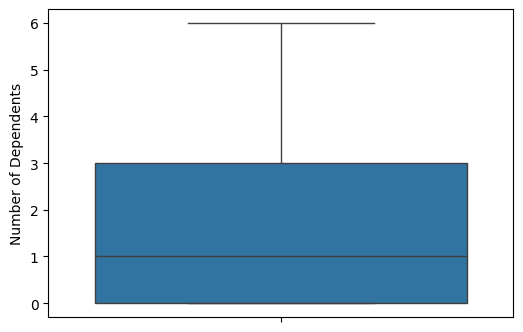

Results for Company Tenure------------------



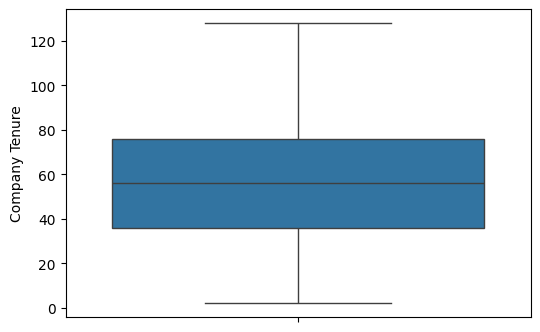

In [ ]:
for i in train_data_num:
  print(f"Results for {i}------------------\n")
  plt.figure(figsize=(6,4))
  sns.boxplot(train_data[i]) # Plotting box plot for numerical variables to check for outliers
  plt.show()

In [ ]:
def outlier_method1(x):
  x=x.clip(upper=x.quantile(.95)) # Clipping upper bond at 95 percentile to eliminate outliers
  # x=x.clip(lower=x.quantile(.01))
  return x

In [ ]:
train_data_new_num=train_data[train_data_num].apply(outlier_method1)

In [ ]:
test_data_new_num=test_data[test_data_num].apply(outlier_method1)

In [ ]:
train_data_new_num

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,31,19,5390,2,22,0,89
1,57,4,5534,3,21,3,21
2,24,10,8159,0,11,3,74
3,36,7,3989,1,27,2,50
4,56,38,4821,0,71,0,68
...,...,...,...,...,...,...,...
59593,50,12,4414,1,66,2,35
59594,18,4,8040,3,42,0,73
59595,22,14,7944,0,34,2,29
59596,23,8,2931,0,62,0,9


Results for Age------------------



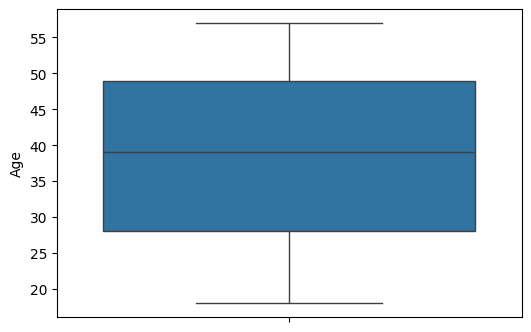

Results for Years at Company------------------



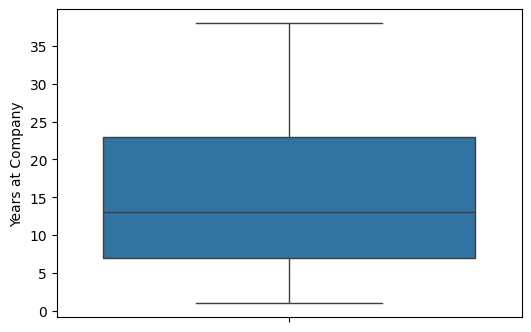

Results for Monthly Income------------------



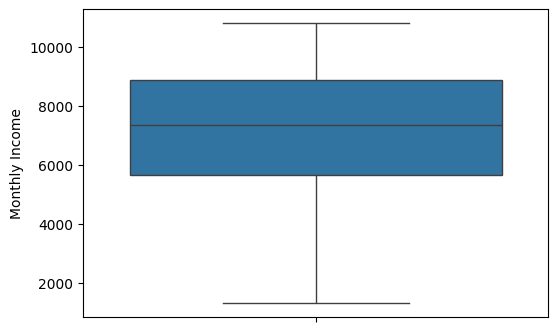

Results for Number of Promotions------------------



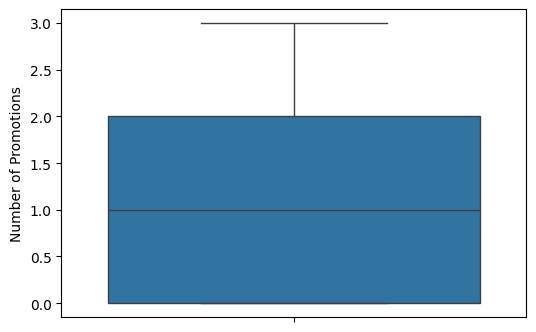

Results for Distance from Home------------------



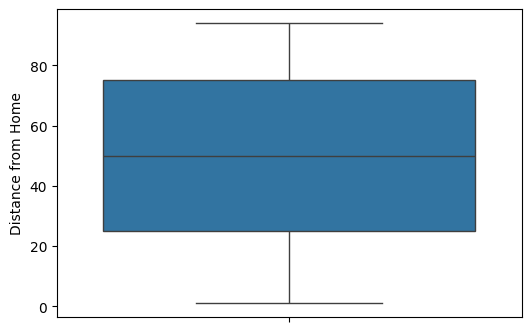

Results for Number of Dependents------------------



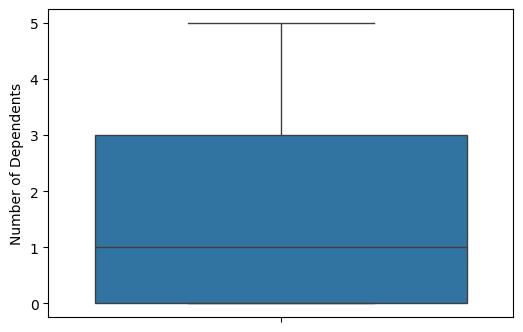

Results for Company Tenure------------------



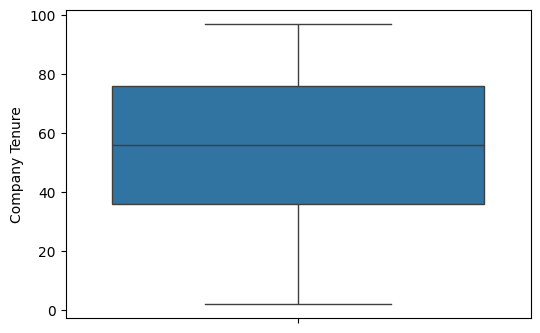

In [ ]:
for i in train_data_new_num:
  print(f"Results for {i}------------------\n")
  plt.figure(figsize=(6,4))
  sns.boxplot(train_data_new_num[i])
  plt.show()

In [ ]:
train_data_cat=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition']

In [ ]:
test_data_cat=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Attrition']

In [ ]:
# Dummy Creation

In [ ]:
train_data_new_cat1=pd.get_dummies(train_data[train_data_cat],drop_first=True,dtype='int')

In [ ]:
test_data_new_cat1=pd.get_dummies(test_data[test_data_cat],drop_first=True,dtype='int')

In [ ]:
train_data_new_cat1

,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,...,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Attrition_Stayed
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
59594,1,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
59595,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
59596,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Final data

In [ ]:
final_train_data=pd.concat([train_data_new_num,train_data_new_cat1],axis=1)

In [ ]:
final_test_data=pd.concat([test_data_new_num,test_data_new_cat1],axis=1)

In [ ]:
final_train_data

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Attrition_Stayed
0,31,19,5390,2,22,0,89,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,57,4,5534,3,21,3,21,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,24,10,8159,0,11,3,74,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,36,7,3989,1,27,2,50,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,56,38,4821,0,71,0,68,1,0,0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,12,4414,1,66,2,35,0,0,0,...,1,0,1,0,0,1,0,0,1,0
59594,18,4,8040,3,42,0,73,1,0,1,...,1,1,0,0,0,0,1,0,0,0
59595,22,14,7944,0,34,2,29,0,0,0,...,0,0,1,0,1,0,0,1,0,1
59596,23,8,2931,0,62,0,9,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Separate features and target variable in training data
X_train = final_train_data.iloc[:, :-1]  # Features
y_train = final_train_data.iloc[:, -1]   # Target

# Separate features and target variable in test data
X_test = final_test_data.iloc[:, :-1]  # Features
y_test = final_test_data.iloc[:, -1]   # Target


In [ ]:
dt=DecisionTreeClassifier(random_state=55)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=55)

In [ ]:
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 1.0
Test score : 0.6698657718120805


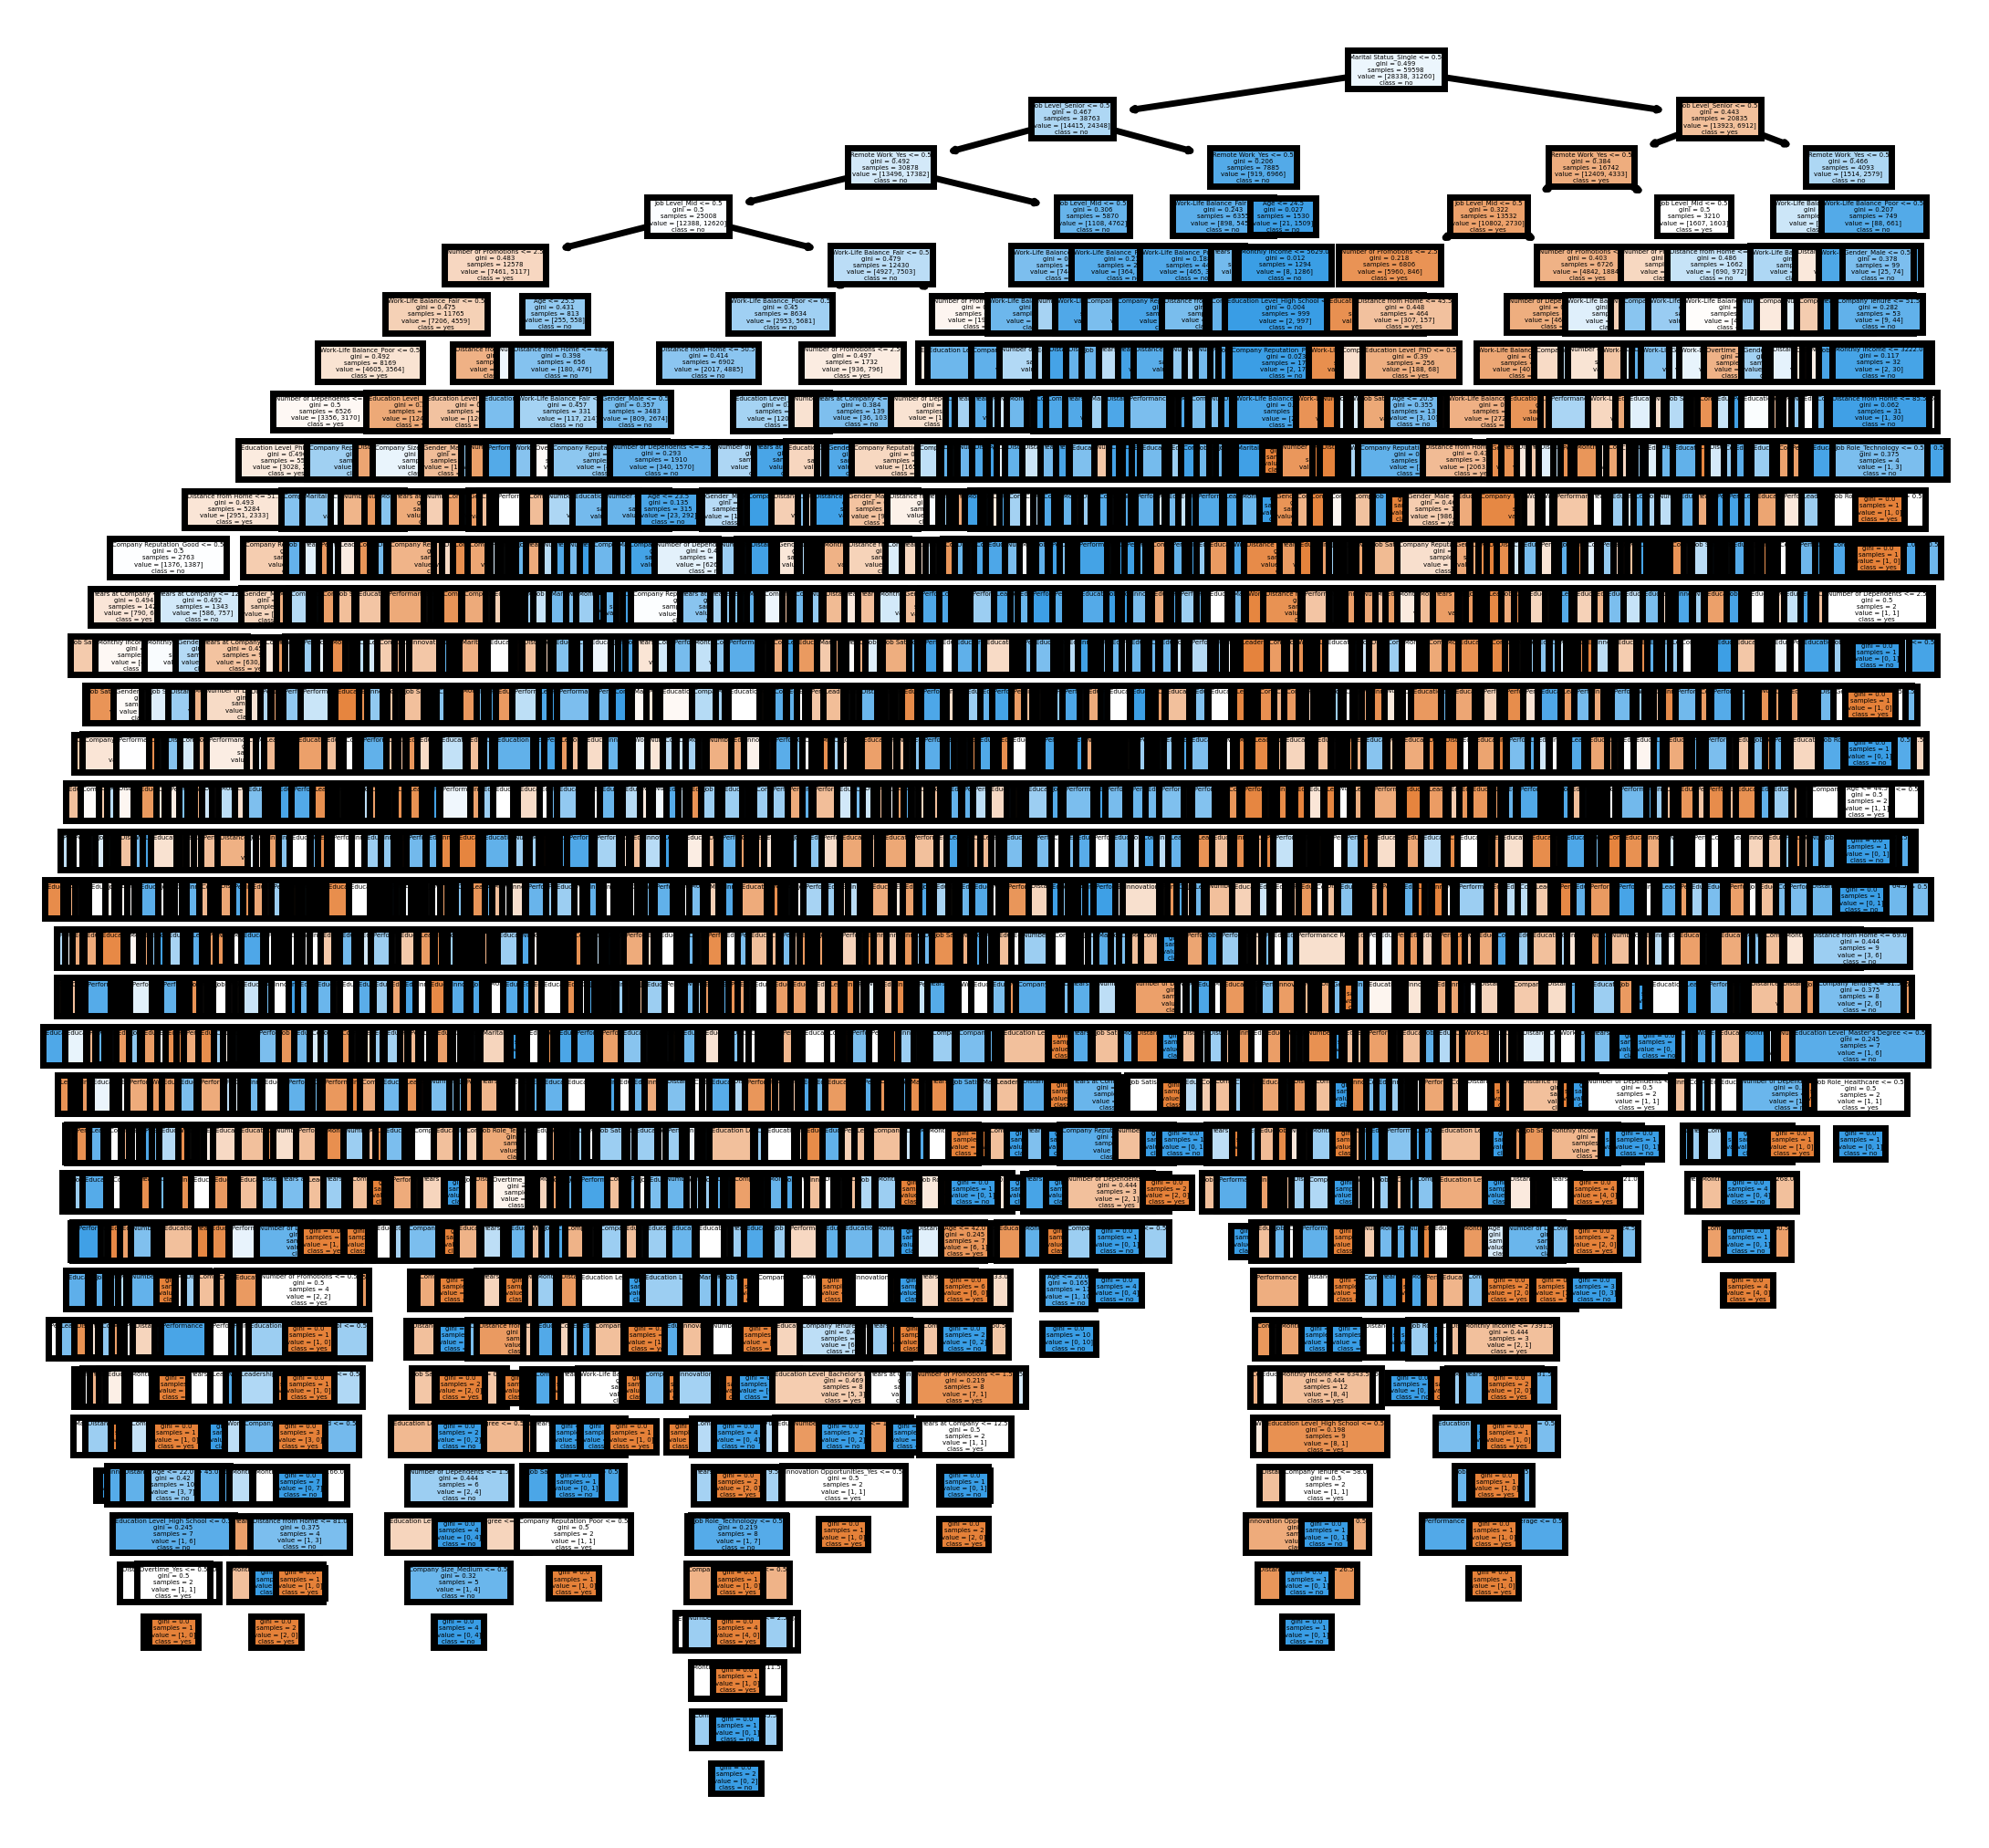

In [ ]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 500 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,
           feature_names = fn,
           class_names=cn,
           filled = True);

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10, random_state=55, min_samples_split=200, min_samples_leaf=50)
dt1.fit(X_train, y_train)
print("Train score :", dt1.score(X_train, y_train))
print("Test score :", dt1.score(X_test, y_test))

Train score : 0.7455283734353502
Test score : 0.74


In [ ]:
# Grid Search to find out best parameters

In [ ]:
%timeit
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[10,50,100,150,200,300,400,500],
              'max_depth':[8,9,10,11,12,14,16,18,20],
              "min_samples_leaf":[10,50,100, 150,200,300,400,500],
              "max_features":["auto", "log2", "sqrt"]
             }
tr = DecisionTreeClassifier(random_state=55)
gsearch = GridSearchCV(estimator=tr, param_grid=parameters, cv=10,  n_jobs=-1, scoring="accuracy")

gsearch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=55),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 9, 10, 11, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [10, 50, 100, 150, 200, 300, 400,
                                              500],
                         'min_samples_split': [10, 50, 100, 150, 200, 300, 400,
                                               500]},
             scoring='accuracy')

In [ ]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 300}

In [ ]:
gsearch.best_score_

0.7221550195913689

In [ ]:
dt2=DecisionTreeClassifier(max_depth=20,
                           criterion="entropy",
                           min_samples_split=300,
                            min_samples_leaf= 10
                           )
dt2.fit(X_train, y_train)

print("Train accuracy:", dt2.score(X_train,y_train))

print("Test accuracy:", dt2.score(X_test,y_test))

Train accuracy: 0.753431323198765
Test accuracy: 0.7397986577181208


In [ ]:
# Finding the top features according to importance

In [ ]:
dt2.feature_importances_

array([0.00702595, 0.02094683, 0.00892326, 0.04959792, 0.04045222,
       0.03469181, 0.00571375, 0.02524175, 0.00038812, 0.        ,
       0.00068444, 0.        , 0.05806572, 0.00407018, 0.05954732,
       0.00108428, 0.        , 0.00492469, 0.00096393, 0.00041399,
       0.00088587, 0.00462274, 0.        , 0.00047137, 0.        ,
       0.03272103, 0.00240955, 0.19103425, 0.06950847, 0.20174076,
       0.        , 0.00114355, 0.14288162, 0.        , 0.00021325,
       0.00090165, 0.01567494, 0.01305477])

In [ ]:
Feat_imp=pd.DataFrame({"Features":X_train.columns, "imp":dt2.feature_importances_}).sort_values(by=["imp"],ascending=False)
Feat_imp[Feat_imp["imp"]>=0.03]["Features"].values # Extracting names of the features that has more importance than 0.03

array(['Job Level_Senior', 'Marital Status_Single', 'Remote Work_Yes',
       'Job Level_Mid', 'Work-Life Balance_Poor',
       'Work-Life Balance_Fair', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Education Level_PhD'], dtype=object)

In [ ]:
X_train1=X_train[['Job Level_Senior', 'Marital Status_Single', 'Remote Work_Yes',
       'Job Level_Mid', 'Work-Life Balance_Poor',
       'Work-Life Balance_Fair', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Education Level_PhD']] # Putting those features in X train

In [ ]:
X_test1=X_test[['Job Level_Senior', 'Marital Status_Single', 'Remote Work_Yes',
       'Job Level_Mid', 'Work-Life Balance_Poor',
       'Work-Life Balance_Fair', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Education Level_PhD']]  # Putting those features in X test

In [ ]:
dt3=DecisionTreeClassifier(max_depth=20,
                           criterion="entropy",
                           min_samples_split=300,
                            min_samples_leaf= 10
                           )
dt3.fit(X_train1, y_train)

print("Train accuracy:", dt3.score(X_train1,y_train))

print("Test accuracy:", dt3.score(X_test1,y_test))    # Running the model with best parametersand best features gathered with the help of grid search and feature_importance_

Train accuracy: 0.7447565354542098
Test accuracy: 0.7392617449664429


In [ ]:
pred_train=dt3.predict(X_train1)   # Classes , (1,0)
pred_test=dt3.predict(X_test1)

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), index=["Act0", "Act1"], columns=["pred0", "pred1"]) # Confusion matrix for train data

,pred0,pred1
Act0,20672,7666
Act1,7546,23714


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), index=["Act0", "Act1"], columns=["pred0", "pred1"]) # Confusion matrix for test data

,pred0,pred1
Act0,5058,1974
Act1,1911,5957


In [ ]:
print(metrics.classification_report(y_train, pred_train)) # Classification report for train data


              precision    recall  f1-score   support

           0       0.73      0.73      0.73     28338
           1       0.76      0.76      0.76     31260

    accuracy                           0.74     59598
   macro avg       0.74      0.74      0.74     59598
weighted avg       0.74      0.74      0.74     59598



In [ ]:
print(metrics.classification_report(y_test, pred_test)) # Classification report for test data

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      7032
           1       0.75      0.76      0.75      7868

    accuracy                           0.74     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.74      0.74      0.74     14900



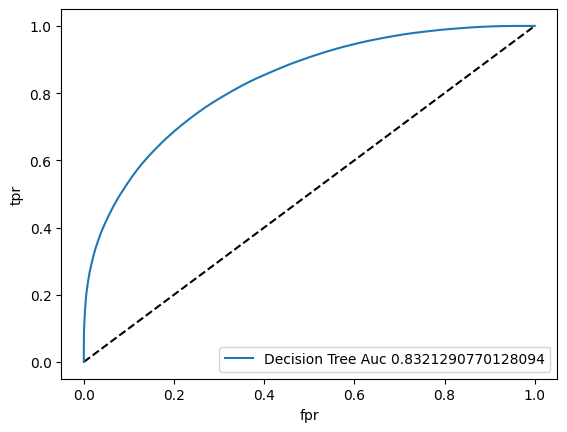

In [ ]:
probs=dt3.predict_proba(X_train1)[:,1]
auc=metrics.roc_auc_score(y_train,probs)
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label=f'Decision Tree Auc '+str(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [ ]:
new_emp=pd.DataFrame({ "Job Level_Senior":[0],                     # Checking the model's functionality using new data
                       "Marital Status_Single":[1],
                       "Remote Work_Yes":[0],
                       "Job Level_Mid":[1],
                       "Work-Life Balance_Poor":[0],
                       "Work-Life Balance_Fair":[1],
                       "Number of Promotions":[2],
                       "Distance from Home":[10],
                       "Number of Dependents":[0],
                       "Education Level_PhD":[1]
                       })

In [ ]:
dt3.predict_proba(new_emp) # Prediction made by the model on new data

array([[0.51818182, 0.48181818]])